In [1]:
import polars as pl
import numpy as np

In [2]:
df = pl.read_csv("../resources/all_trust.csv").filter(pl.col("インデックス対象") == "〇")
df.describe()

statistic,協会コード,ファンド名,愛称,ファンド名略称,委託会社,積立対象,NISA (成長投資枠),NISA (つみたて投資枠),金額指定対象,口数指定対象,インデックス対象,為替ヘッジあり対象,通貨選択型対象,ファンド分類,ファンド分類詳細,投資地域,基準価額(円),前日比(円),前日比率,設定来高値,設定来高値 (日付),設定来安値,設定来安値 (日付),純資産(百万円),販売金額ランキング,前回比較,買付手数料,信託報酬,信託報酬 (追加文言),信託財産留保額,信託財産留保額 (追加文言),直近分配金（円）,年間分配金累計(円),分配金利回り,次回決算日,決算頻度,基準価額単位 (口あたり),約定日,受渡日,設定日,償還日,当社取扱日,騰落率(前日比),騰落率(前週比),騰落率(前月比),騰落率(6ヵ月),騰落率(1年),騰落率(3年),トータルリターン(6ヵ月),トータルリターン(1年),トータルリターン(3年),3ヵ月連続流入,3ヵ月連続流出,リスクメジャー(3年),シャープレシオ(1年),標準偏差（σ-シグマ）（1年）,ファンドレーティング(総合)
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,str,f64,f64,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""",467.0,467.0,467.0,467.0,"""467""",467.0,"""467""",467.0,216.0,"""467""",467.0,467.0,"""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""",467.0,"""467""","""467""","""467""","""467""","""467""",467.0,467.0,"""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467""","""467"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,251.0,"""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,21550.383298,-28.042827,-0.139422,22530.051392,null,8251.576017,null,87064.331906,233.138889,null,0.0,0.422269,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,null,-0.139422,0.750964,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,12993.060787,99.008227,0.456914,13131.55991,null,1648.937725,null,497316.178944,150.336086,null,0.0,0.295389,null,null,null,null,null,null,null,null,0.0,null,null,null,null,null,0.456914,0.96453,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""01311143""","""しんきん−しんきん米国ウォーターファンド""","""""","""ALAMCOMSCIグロアセ株式""","""しんきんアセットマネジメント投信""","""""","""""","""""","""""","""""","""〇""","""""","""""","""コモディティ""","""コモディティ""","""アジア""",4709.0,-428.0,-2.78,10018.0,"""1989/09/19""",1268.0,"""2001/02/02""",11.0,1.0,"""""",0.0,0.05775,"""""","""0.05%""","""""","""""","""""","""""","""2025/07/15""","""四半期""",10000.0,"""ご注文日の2営業日後""","""約定日から2営業日後""","""1985/09/20""","""""","""2006/01/28""",-2.78,-3.69,"""-0.21""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""25%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,12628.0,-61.0,-0.28,13397.0,null,7495.0,null,1859.0,96.0,null,0.0,0.187,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,null,-0.28,0.12,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,17827.0,-23.0,-0.14,18588.0,null,8717.0,null,9179.0,225.0,null,0.0,0.385,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,null,-0.14,0.77,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,26394.0,8.0,0.05,27176.0,null,9462.0,null,34122.0,355.0,null,0.0,0.55,null,null,null,null,null,null,null,null,10000.0,null,null,null,null,null,0.05,1.44,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""B6311231""","""ｓｕｓｔｅｎ−マネーフォワード全世界株式インデックスファンド""","""ＳＢＩ・Ｖ・Ｓ＆Ｐ５００""","""ｉシェアーズゴールドＨ無""","""ｓｕｓｔｅｎキャピタ

In [82]:
df.head()

協会コード,ファンド名,愛称,ファンド名略称,委託会社,積立対象,NISA (成長投資枠),NISA (つみたて投資枠),金額指定対象,口数指定対象,インデックス対象,為替ヘッジあり対象,通貨選択型対象,ファンド分類,ファンド分類詳細,投資地域,基準価額(円),前日比(円),前日比率,設定来高値,設定来高値 (日付),設定来安値,設定来安値 (日付),純資産(百万円),販売金額ランキング,前回比較,買付手数料,信託報酬,信託報酬 (追加文言),信託財産留保額,信託財産留保額 (追加文言),直近分配金（円）,年間分配金累計(円),分配金利回り,次回決算日,決算頻度,基準価額単位 (口あたり),約定日,受渡日,設定日,償還日,当社取扱日,騰落率(前日比),騰落率(前週比),騰落率(前月比),騰落率(6ヵ月),騰落率(1年),騰落率(3年),トータルリターン(6ヵ月),トータルリターン(1年),トータルリターン(3年),3ヵ月連続流入,3ヵ月連続流出,リスクメジャー(3年),シャープレシオ(1年),標準偏差（σ-シグマ）（1年）,ファンドレーティング(総合)
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,f64,i64,str,i64,str,i64,i64,str,f64,f64,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str
"""0331418A""","""三菱ＵＦＪ−ｅＭＡＸＩＳ Ｓｌｉｍ 全世界株式（オール・カン…","""""","""eMAXIS Slim 全世界オール""","""三菱ＵＦＪアセットマネジメント""","""〇""","""〇""","""〇""","""〇""","""〇""","""〇""","""""","""""","""国際株式""","""国際株式・グローバル・含む日本（F）""","""グローバル""",28169,-39,-0.14,28208,"""2025/07/11""",8102,"""2020/03/24""",6620790,1,"""→""",0.0,0.05775,"""以内""","""なし""","""""","""0""","""0""","""""","""2026/04/27""","""年1回""",10000,"""ご注文日の翌営業日""","""約定日から4営業日後""","""2018/10/31""","""""","""2018/11/01""",-0.14,1.51,"""5.56""","""4.44""","""5.19""","""74.4""","""-0.67""","""4""","""19.19""","""〇""","""""","""3""","""0.24""","""15.44""","""5"""
"""03311187""","""三菱ＵＦＪ−ｅＭＡＸＩＳ Ｓｌｉｍ 米国株式（Ｓ＆Ｐ５００）""","""""","""eMAXIS Slim S&P500""","""三菱ＵＦＪアセットマネジメント""","""〇""","""〇""","""〇""","""〇""","""〇""","""〇""","""""","""""","""国際株式""","""国際株式・北米（F）""","""北米""",33499,-29,-0.09,34638,"""2025/01/24""",8432,"""2020/03/24""",7712551,2,"""→""",0.0,0.0814,"""以内""","""なし""","""""","""0""","""0""","""""","""2026/04/27""","""年1回""",10000,"""ご注文日の翌営業日""","""約定日から3営業日後""","""2018/07/03""","""""","""2018/07/03""",-0.09,1.5,"""6.49""","""0.61""","""4.68""","""82.02""","""-4.84""","""2.32""","""21.13""","""〇""","""""","""4""","""0.11""","""18.62""","""5"""
"""89311199""","""ＳＢＩ−ＳＢＩ・Ｖ・Ｓ＆Ｐ５００インデックス・ファンド""","""ＳＢＩ・Ｖ・Ｓ＆Ｐ５００""","""SBI・V・S&P500インデ""","""ＳＢＩアセットマネジメント""","""〇""","""〇""","""〇""","""〇""","""〇""","""〇""","""""","""""","""国際株式""","""国際株式・北米（F）""","""北米""",30635,-35,-0.11,31678,"""2025/01/24""",7742,"""2020/03/24""",2153870,3,"""→""",0.0,0.0938,"""程度""","""なし""","""""","""0""","""0""","""""","""2025/09/16""","""年1回""",10000,"""ご注文日の翌営業日""","""約定日から3営業日後""","""2019/09/26""","""""","""2019/09/26""",-0.11,1.45,"""6.4""","""0.61""","""4.72""","""81.64""","""-4.83""","""2.33""","""21.08""","""〇""","""""","""4""","""0.11""","""18.61""","""5"""
"""04311181""","""大和−ｉＦｒｅｅＮＥＸＴ ＦＡＮＧ＋インデックス""","""""","""iFreeNEXT FANG＋インデ""","""大和アセットマネジメント""","""〇""","""〇""","""〇""","""〇""","""〇""","""〇""","""""","""""","""国際株式""","""国際株式・北米（F）""","""北米""",73822,-98,-0.13,74469,"""2025/07/10""",8044,"""2018/12/25""",678883,4,"""→""",0.0,0.7755,"""""","""なし""","""""","""0""","""0""","""""","""2026/01/30""","""年1回""",10000,"""ご注文日の翌営業日""","""約定日から3営業日後""","""2018/01/31""","""""","""2018/02/22""",-0.13,0.07,"""6.69""","""6.81""","""15.82""","""211.93""","""1.1""","""17.28""","""45.74""","""〇""","""""","""5""","""0.54""","""31.33""","""5"""
"""29313233""","""ニッセイ−ニッセイＮＡＳＤＡＱ１００インデックスファンド＜購…","""""","""NASDAQ100インデックス""","""ニッセイアセットマネジメント""","""〇""","""〇""","""""","""〇""","""〇""","""〇""","""""","""""","""国際株式""","""国際株式・北米（F）""","""北米""",19900,6,0.03,20407,"""2024/12/27""",9996,"""2023/04/06""",326072,10,"""↓""",0.0,0.2035,"""""","""なし""","""""","""0""","""0""","""""","""2025/09/22""","""年1回""",10000,"""ご注文日の翌営業日""","""約定日から3営業日後""","""2023/03/31""","""""","""2023/03/31""",0.03,1.42,"""6.86""","""2.51""","""4.62""","""""","""-3.69""","""2.85""","""""","""〇""","""""","""""","""0.11""","""24.1""",""""""


In [3]:
# display unique combinations of fund classification, detailed classification, and investment region with counts
df.group_by(["ファンド分類", "ファンド分類詳細", "投資地域"]).len().sort("len", descending=True)

ファンド分類,ファンド分類詳細,投資地域,len
str,str,str,u32
"""国際株式""","""国際株式・北米（F）""","""北米""",60
"""国内株式""","""国内大型ブレンド""","""日本""",43
"""バランス""","""バランス""","""グローバル""",41
"""国内株式""","""国内大型グロース""","""日本""",37
"""国際株式""","""国際株式・グローバル・含む日本（F）""","""グローバル""",36
…,…,…,…
"""国際REIT""","""国際REIT・特定地域（F）""","""オセアニア""",1
"""国際REIT""","""国際REIT・グローバル・含む日本（F）""","""グローバル""",1
"""国内債券""","""国内債券・物価連動債""","""日本""",1


In [4]:
df.select("ファンド分類").unique()

ファンド分類
str
"""国際債券"""
"""国内株式"""
"""国際REIT"""
"""コモディティ"""
"""国際株式"""
"""国内REIT"""
"""国内債券"""
"""バランス"""


In [4]:
def calculate_binary_corr(df1:pl.DataFrame, df2:pl.DataFrame) -> float:

    df1 = df1.rename({"基準価額": "基準価額1"})
    df2 = df2.rename({"基準価額": "基準価額2"})

    df = df1.join(df2, on="年月日", how="inner").drop_nulls()
    x1 = df["基準価額1"].to_numpy()
    x2 = df["基準価額2"].to_numpy()

    return np.corrcoef(x1, x2)[0, 1]

In [5]:
symbols = sorted(df.filter((pl.col("ファンド分類") == "国際株式") & (pl.col("ファンド分類詳細") == "国際株式・北米（F）") & (pl.col("投資地域") == "北米")).select("協会コード").to_series().to_list())
data = {}

for symbol in symbols:

    try:
        temp = pl.read_csv(f"../data/trust/{symbol}.csv")
        data[symbol] = temp.select(["年月日", "基準価額"])

    except FileNotFoundError:

        symbols.remove(symbol)
        continue

corr_mat = [calculate_binary_corr(data[symbol1], data[symbol2]) for symbol1 in data.keys() for symbol2 in data.keys()]

In [6]:
np.array(corr_mat).shape

(3364,)

<Axes: >

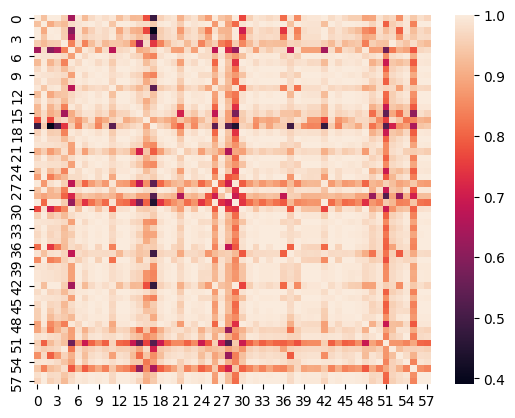

In [7]:
import seaborn as sns
sns.heatmap(np.array(corr_mat).reshape(len(data), len(data)))

<Axes: >

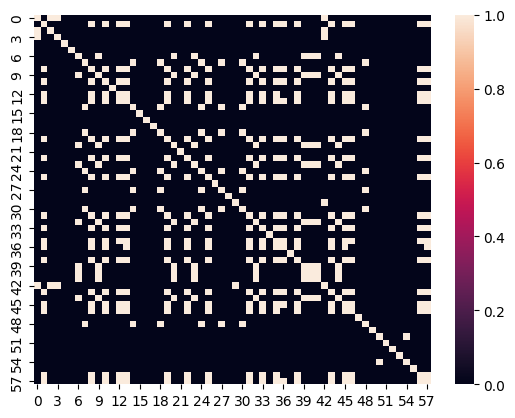

In [71]:
a = np.array(corr_mat).reshape(len(data), len(data))
mask = a > 0.999
sns.heatmap(mask)

In [73]:
from queue import Queue

s = np.array(list(data.keys()))

clusters = np.zeros(len(s), dtype=int)
visited = np.zeros(len(s), dtype=bool)

q = Queue()
cluster_id = 0

while not visited.all():

    if q.empty():

        cluster_id += 1
        q.put(np.where(~visited)[0][0])

    idx = q.get()

    if visited[idx]: continue

    visited[idx] = True
    clusters[idx] = cluster_id

    for j in np.where(mask[idx])[0]:

        if not visited[j]:

            q.put(j)

In [74]:
clusters

array([ 1,  2,  1,  1,  3,  4,  5,  6,  2,  5,  2,  7,  2,  2,  6,  8,  9,
       10,  6,  2,  5, 11,  2,  5,  6,  2, 12,  6, 13,  1,  6,  2,  5,  2,
       14,  2,  2, 15,  2,  5,  5,  5,  1,  2,  5,  2,  2, 16,  6, 17, 18,
       19, 20, 21, 18, 22,  2,  2])

In [75]:
with open("clusters.txt", "w") as f:

    for i in range(1, cluster_id + 1):

        f.write(f">Cluster {i}:\n")

        for j in np.where(clusters == i)[0]:

            f.write(df.filter(pl.col("協会コード") == s[j]).select("ファンド名").item() + "\n")

        f.write("\n")

In [87]:
for i in range(1, cluster_id + 1):
 
    idx = np.where(clusters == i)[0]
    df.filter(pl.col("協会コード").is_in(s[idx])).with_columns(
        (pl.when(pl.col("分配金利回り").str.len_chars()==0).then(None).otherwise(pl.col("分配金利回り")).fill_null(0).cast(float) - pl.col("信託報酬").fill_null(0)).alias("criteria")
    ).sort("criteria", descending=True).select(["ファンド名", "信託報酬", "分配金利回り", "criteria"]).write_csv(f"cluster_{i}.csv")
    break